# Scikit-Learn to Solve Regression Machine Learning Problems


## TASK 1: Understand the problem statement and business case

*   In this project, we will learn how to build and train regression models using Scikit-learn library.
*   Scikit-learn is a free machine learning library developed for python.
*   Scikit-learn offers several algorithms for classification, regression, ans clustering.
*   In this project, we will learn how to train XGBoost algorithm. XGBoost is the go-to algorithm for most developers and has won several Kaggle competitions.
*   Why does XGBoost work well?
  * Since the technique is an ensemble algorithm, it is very robust and could work well with several data types and complex distributions.
  * XGBoost has a many tunable hyperparameters that could improve model fitting.

## TASK 2: Import key libraries and datasets

In [1]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=907371f07e0c003b1a55a44e2039906ca7b3544effead23c4799e68187fdea18
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
import wget

URL = "https://files.pythonhosted.org/packages/8a/08/9dee6dfd7f2aad6c30282d55c8f495b4dc1e4747b4e2bdbeb80572ddf312/jupyterthemes-0.20.0-py2.py3-none-any.whl"
wget.download(URL, "jupyterthemes-0.20.0-py2.py3-none-any.whl")

'jupyterthemes-0.20.0-py2.py3-none-any.whl'

In [ ]:
pip install jupyterthemes-0.20.0-py2.py3-none-any.whl

In [ ]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# read the csv file
df = pd.read_csv('Life_Expectancy_Data.csv')
df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
# Check the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# TASK #3: PERFORM DATA VISUALIZATION

<Axes: >

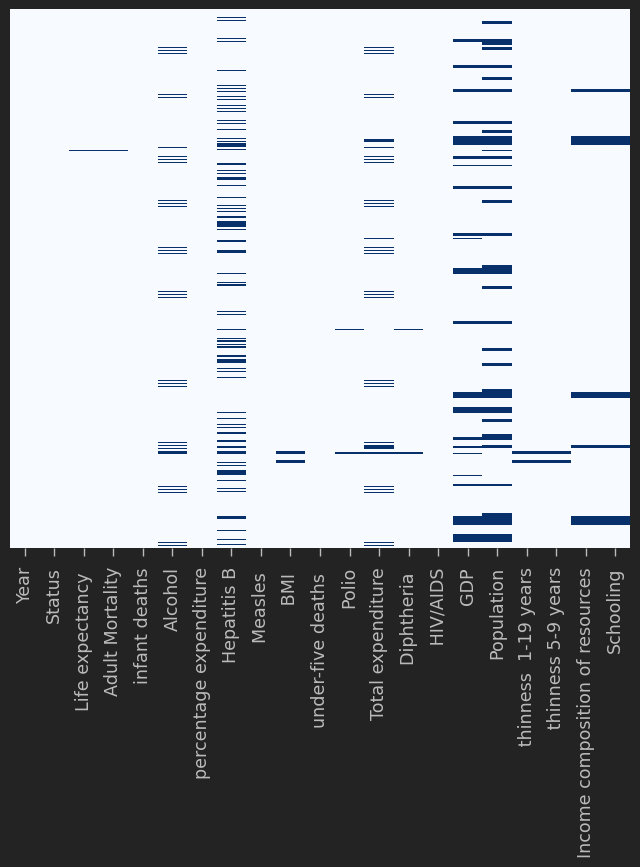

In [ ]:
# check if there are any Null values
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

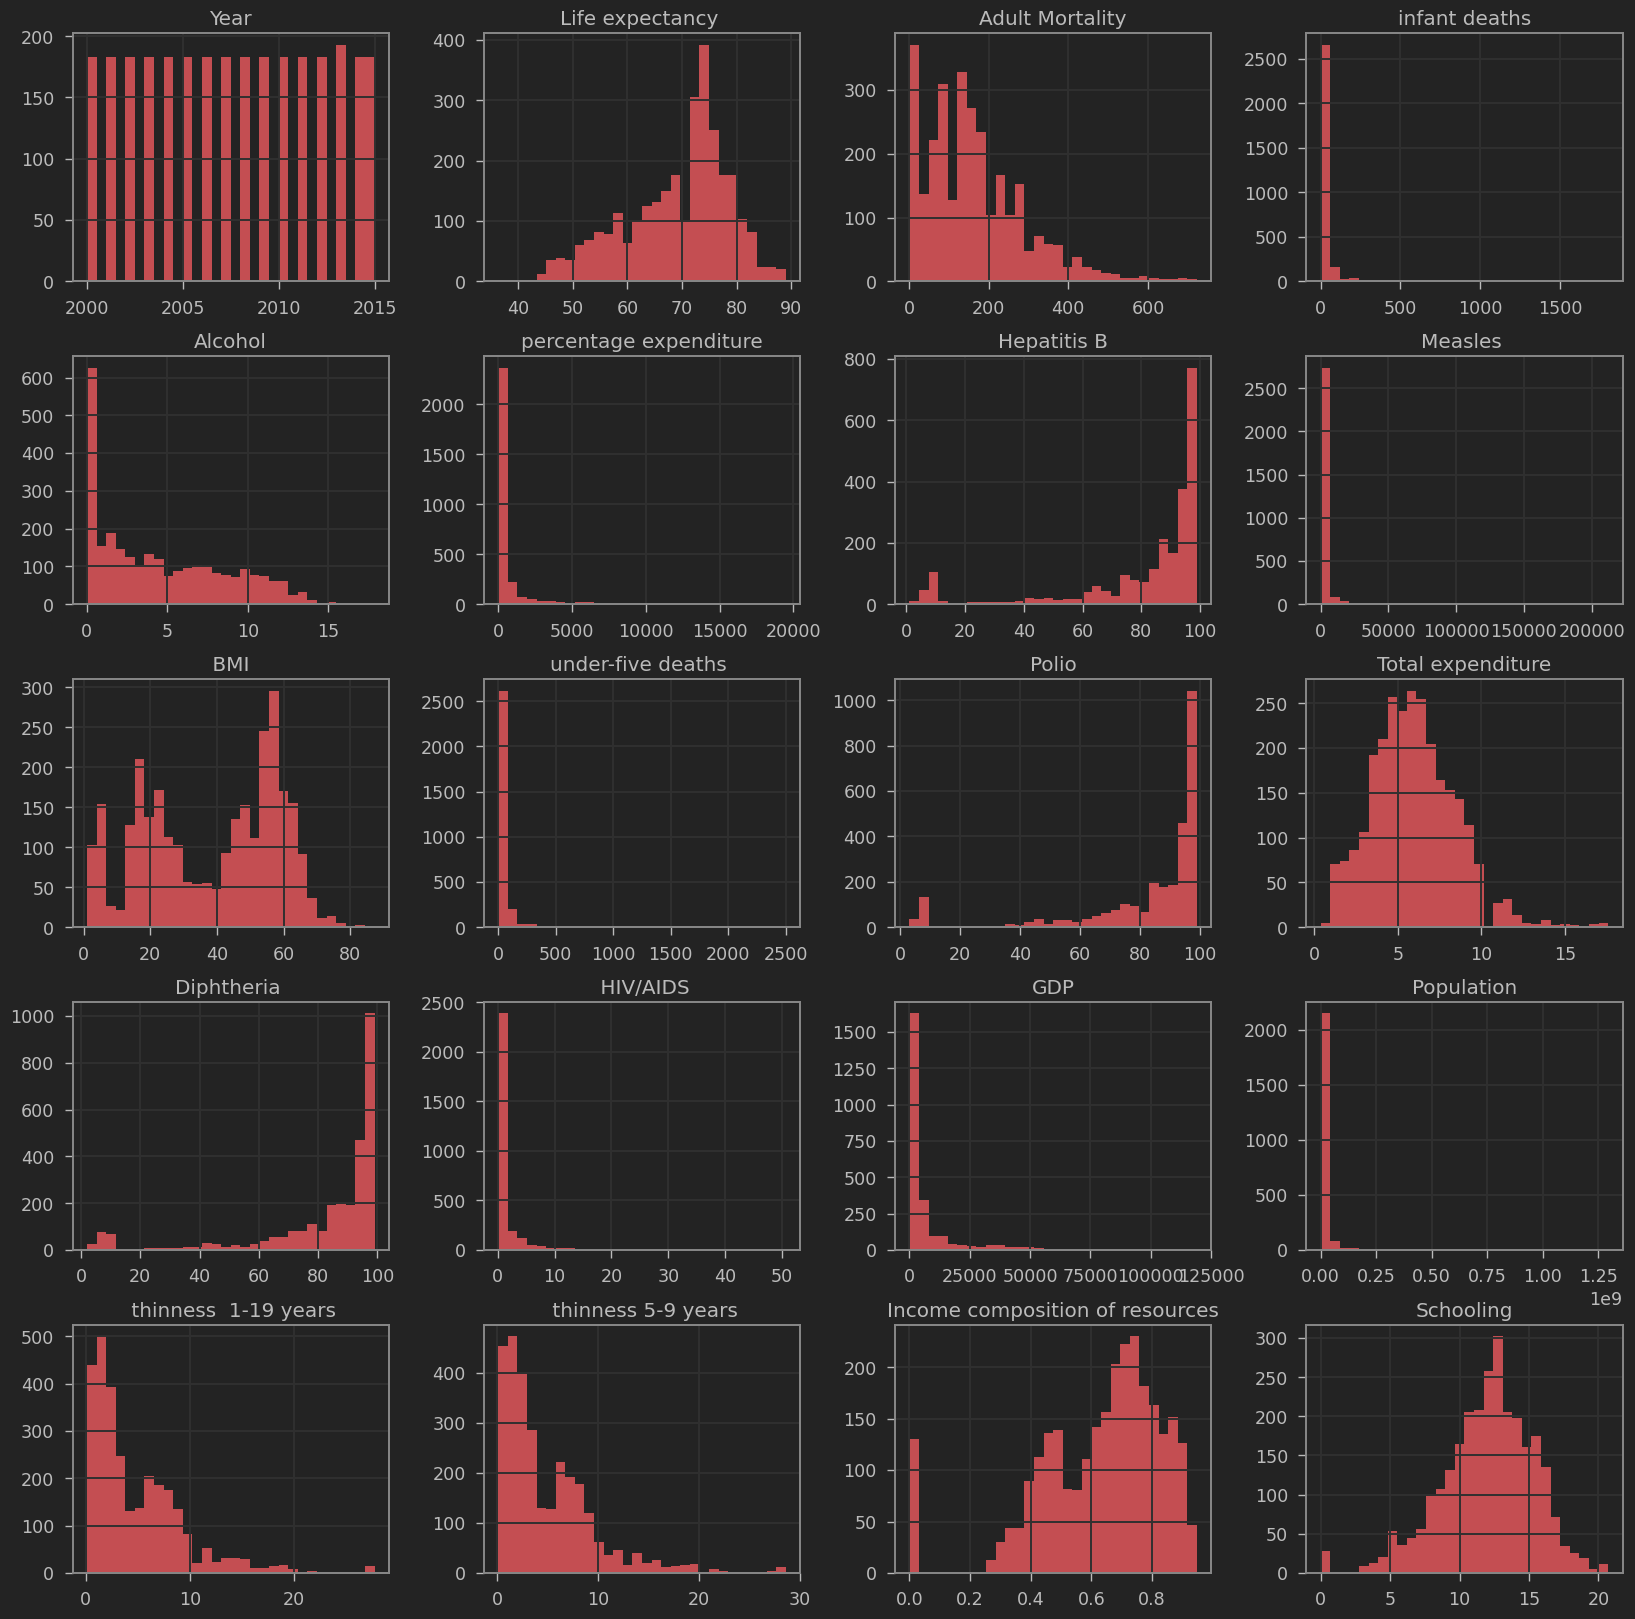

In [ ]:
# Plot the histogram
df.hist(bins = 30, figsize = (20, 20), color = 'r');

In [ ]:
column_name = 'infant deaths'
print("Min {} value: {}".format(column_name, df[column_name].min()))
print("Max {} value: {}".format(column_name, df[column_name].max()))
print("Mean {} value: {}".format(column_name, df[column_name].mean()))
print("Standard deviation {} value: {}".format(column_name, df[column_name].std()))
print("Variance {} value: {}".format(column_name, df[column_name].var()))

Min infant deaths value: 0
Max infant deaths value: 1800
Mean infant deaths value: 30.303948264125257
Standard deviation infant deaths value: 117.92650131339907
Variance infant deaths value: 13906.659712019115


<ipython-input-27-109fa7416aa0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


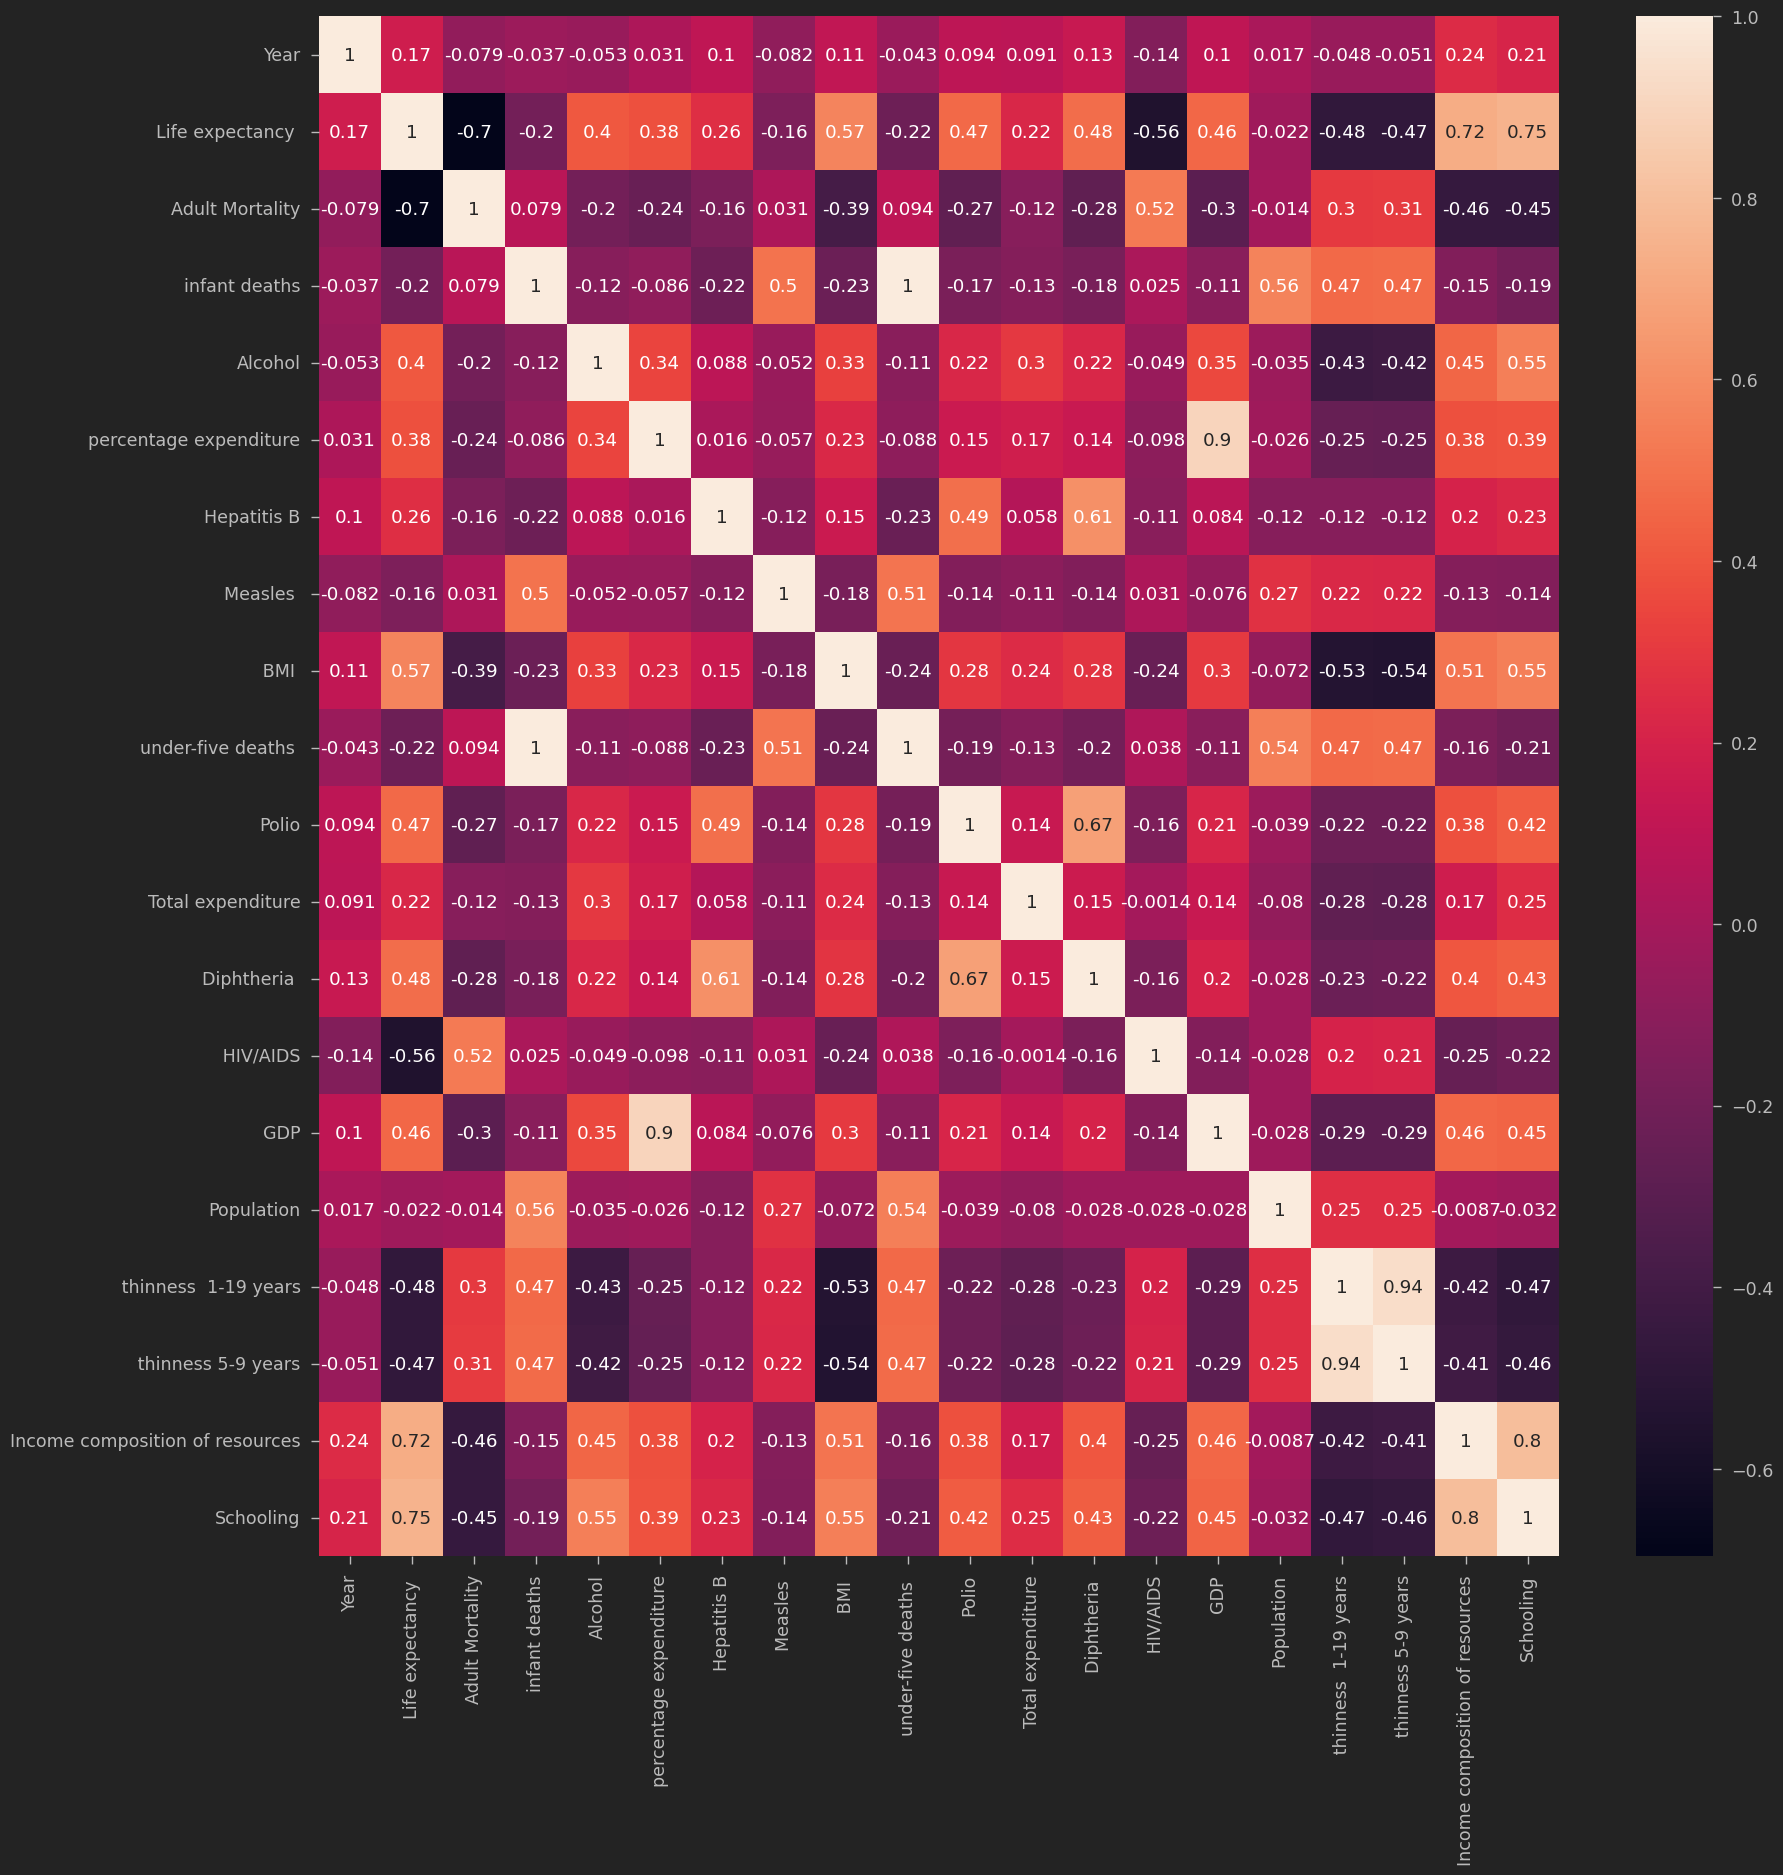

In [ ]:
# Plot the correlation matrix
plt.figure(figsize = (20,20))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

# TASK #4: PERFORM FEATURE ENGINEERING

In [ ]:
# Perform one-hot encoding
df = pd.get_dummies(df, columns = ['Status'])

In [ ]:
df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


In [ ]:
df.isnull().sum()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Status_Developed                     0
Status_Developing                    0
dtype: int64

In [ ]:
# Check the number of null values for the columns having null values
df.isnull().sum()[np.where(df.isnull().sum() != 0)[0]]

Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
# Since most of the are continous values we fill them with mean
df = df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [ ]:
df.isnull().sum()[np.where(df.isnull().sum() != 0)[0]]

Series([], dtype: int64)

<Axes: >

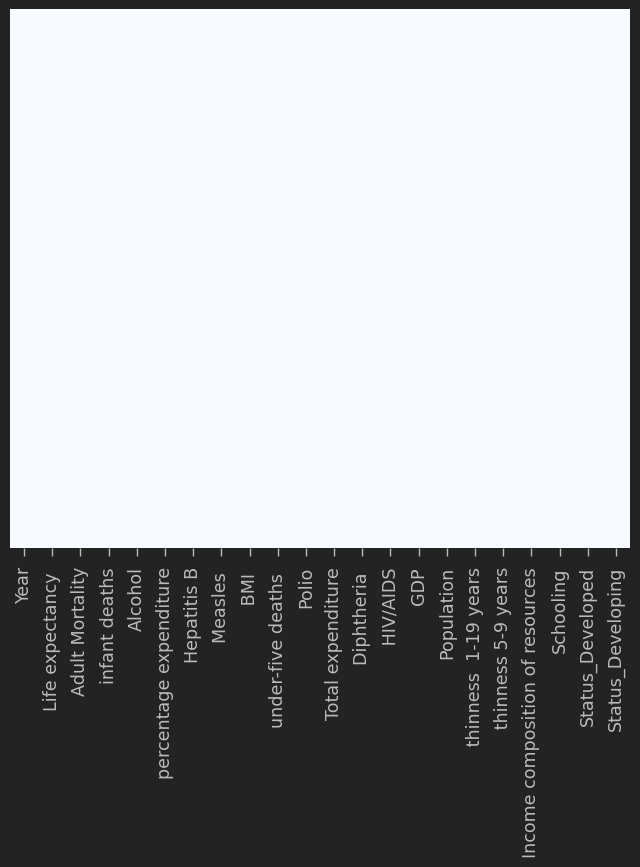

In [ ]:
# check if there are any Null values
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
# Create train and test data
X = df.drop(columns = ['Life expectancy '])
y = df[['Life expectancy ']]


In [ ]:
# Convert the data type to float32
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [ ]:
# spliting the data into training, testing and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
X_train.shape

(2056, 21)

In [ ]:
X_test.shape

(882, 21)

# TASK #5: Understand XGBoost Algorithm

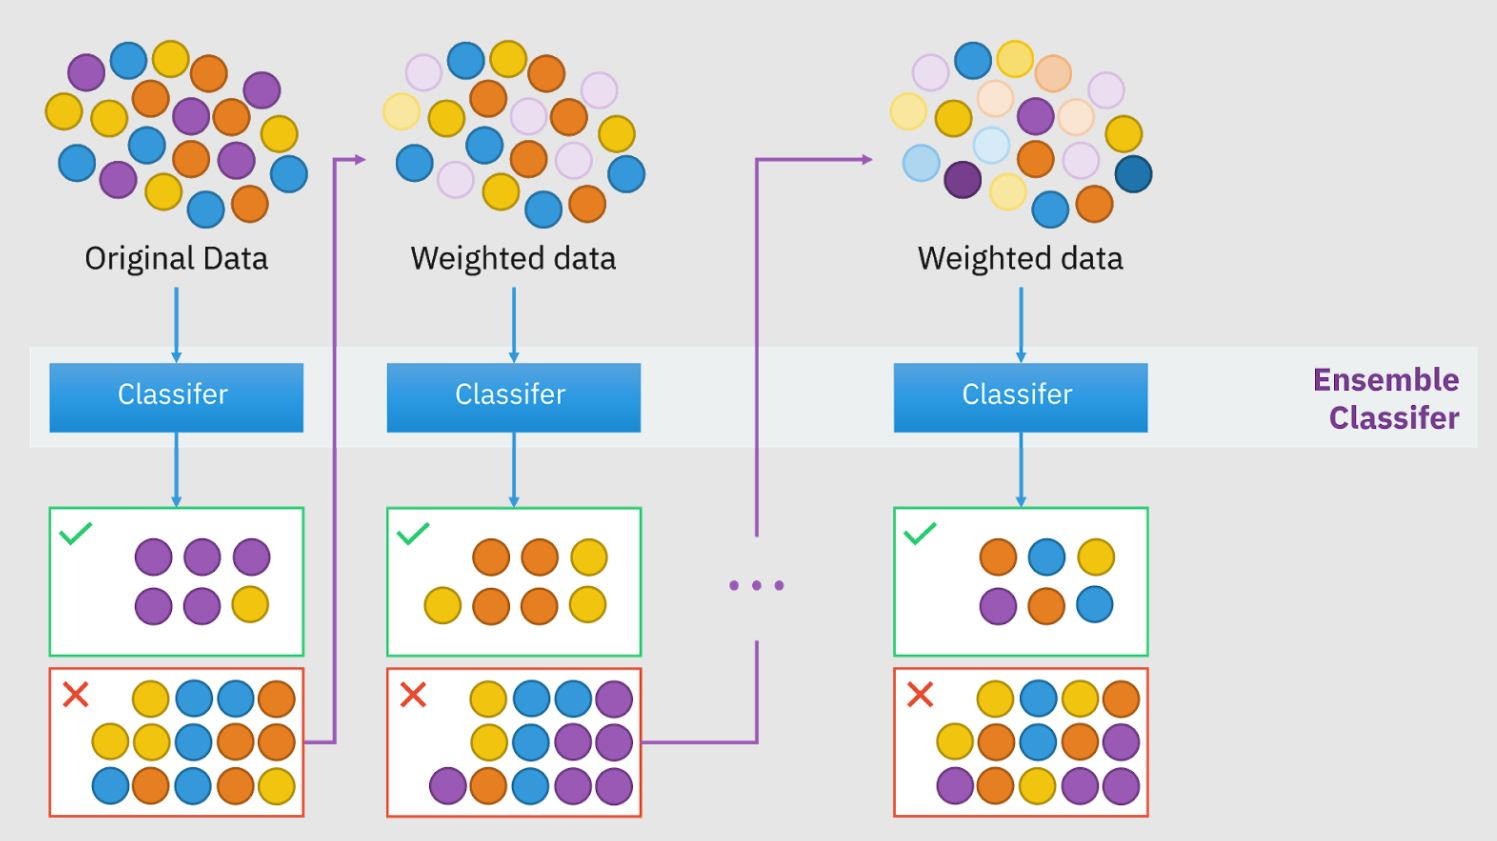

https://arxiv.org/abs/1603.02754

https://xgboost.readthedocs.io/en/stable/index.html

https://pypi.org/project/xgboost/

https://towardsdatascience.com/xgboost-its-genealogy-its-architectural-features-and-its-innovation-bf32b15b45d2

# TASK #6: TRAIN AN XG-BOOST REGRESSION MODEL

In [ ]:
!pip install xgboost

In [ ]:
# Train an XGBoost regressor model
import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 30, n_estimators = 100)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=30, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# TASK #7: ASSESS TRAINED XG-BOOST MODEL PERFORMANCE

In [ ]:
# predict the score of the trained model using the testing dataset
result = model.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.9546427723480742


In [ ]:
# make predictions on the test data
y_predict = model.predict(X_test)
y_predict

array([72.68134 , 68.98564 , 77.49556 , 58.79238 , 74.117546, 74.22426 ,
       78.90421 , 68.42752 , 84.69266 , 74.252525, 75.70837 , 67.85853 ,
       82.531685, 68.01802 , 75.14683 , 63.328747, 56.249596, 76.0877  ,
       72.23183 , 82.61879 , 64.10975 , 62.956623, 76.28702 , 79.94295 ,
       51.743877, 74.85543 , 63.4818  , 73.33981 , 73.36169 , 71.82087 ,
       69.57276 , 69.24945 , 71.86604 , 68.12372 , 72.55329 , 53.20349 ,
       54.065067, 61.85208 , 64.78928 , 65.79378 , 55.784184, 58.496582,
       75.09574 , 76.77757 , 67.19399 , 72.29631 , 67.737495, 54.834324,
       73.99624 , 74.45594 , 57.968536, 66.30396 , 66.599815, 71.35526 ,
       73.043205, 62.301144, 68.14583 , 57.604717, 74.19276 , 50.916897,
       73.72796 , 78.98037 , 71.654144, 75.376045, 73.04742 , 77.372375,
       64.56905 , 66.28324 , 66.85963 , 67.70939 , 70.92354 , 68.40326 ,
       77.6876  , 65.27405 , 67.16081 , 70.766235, 48.419697, 71.92038 ,
       74.44337 , 72.70981 , 49.054344, 75.67993 , 

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 2.094 
MSE = 4.385635 
MAE = 1.2756518 
R2 = 0.9546427723480742 
Adjusted R2 = 0.953535212137969


# FINAL CAPSTONE PROJECT

- In this hands-on project, we will train an XG-Boost regression model to predict university admission.
- Tasks:
    - 1. Load "university_admission.csv" data and Split it into training and testing
    - 2. Train a regression model  
    - 3. Assess trained model performance
    - 4. Plot trained model predictions vs. ground truth output
    - 5. What is R2?

# PRACTICE OPPORTUNITY SOLUTIONS

**PRACTICE OPPORTUNITY #1 SOLUTION:**
- **Obtain dataframe statistical summary**

In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,...,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,0.174268,0.825732
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,...,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381,0.379405,0.379405
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,...,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000,0.000000,1.000000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,...,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000,0.000000,1.000000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,...,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000,0.000000,1.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,...,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,1.000000,1.000000


**PRACTICE OPPORTUNITY #2 SOLUTION:**
- **Set the max depth hyperparameter to a very small number and retrain the moodel**
- **What do you infer from these results?**

In [ ]:
# Train an XGBoost regressor model
import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 2, n_estimators = 100)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
# predict the score of the trained model using the testing dataset
result = model.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.9182316344048722


In [ ]:
# make predictions on the test data
y_predict = model.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 2.717 
MSE = 7.379544 
MAE = 1.9228041 
R2 = 0.9182316344048722 
Adjusted R2 = 0.9162349650124331


# FINAL CAPSTONE PROJECT SOLUTION

In [ ]:
# Read the CSV file
df = pd.read_csv("university_admission.csv")

In [ ]:
# Load the top 6 instances
df.head(6)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90


In [ ]:
# Load the bottom 6 instances
df.tail(6)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
994,301,99,3,2.5,2.0,8.45,1,0.68
995,332,108,5,4.5,4.0,9.02,1,0.87
996,337,117,5,5.0,5.0,9.87,1,0.96
997,330,120,5,4.5,5.0,9.56,1,0.93
998,312,103,4,4.0,5.0,8.43,0,0.73
999,327,113,4,4.5,4.5,9.04,0,0.84


In [ ]:
# Check if any missing values are present in the dataframe
df.isnull().sum()

GRE_Score              0
TOEFL_Score            0
University_Rating      0
SOP                    0
LOR                    0
CGPA                   0
Research               0
Chance_of_Admission    0
dtype: int64

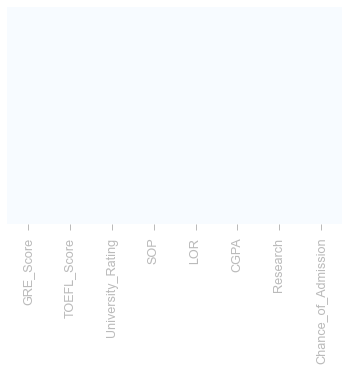

In [ ]:
# check if there are any Null values
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

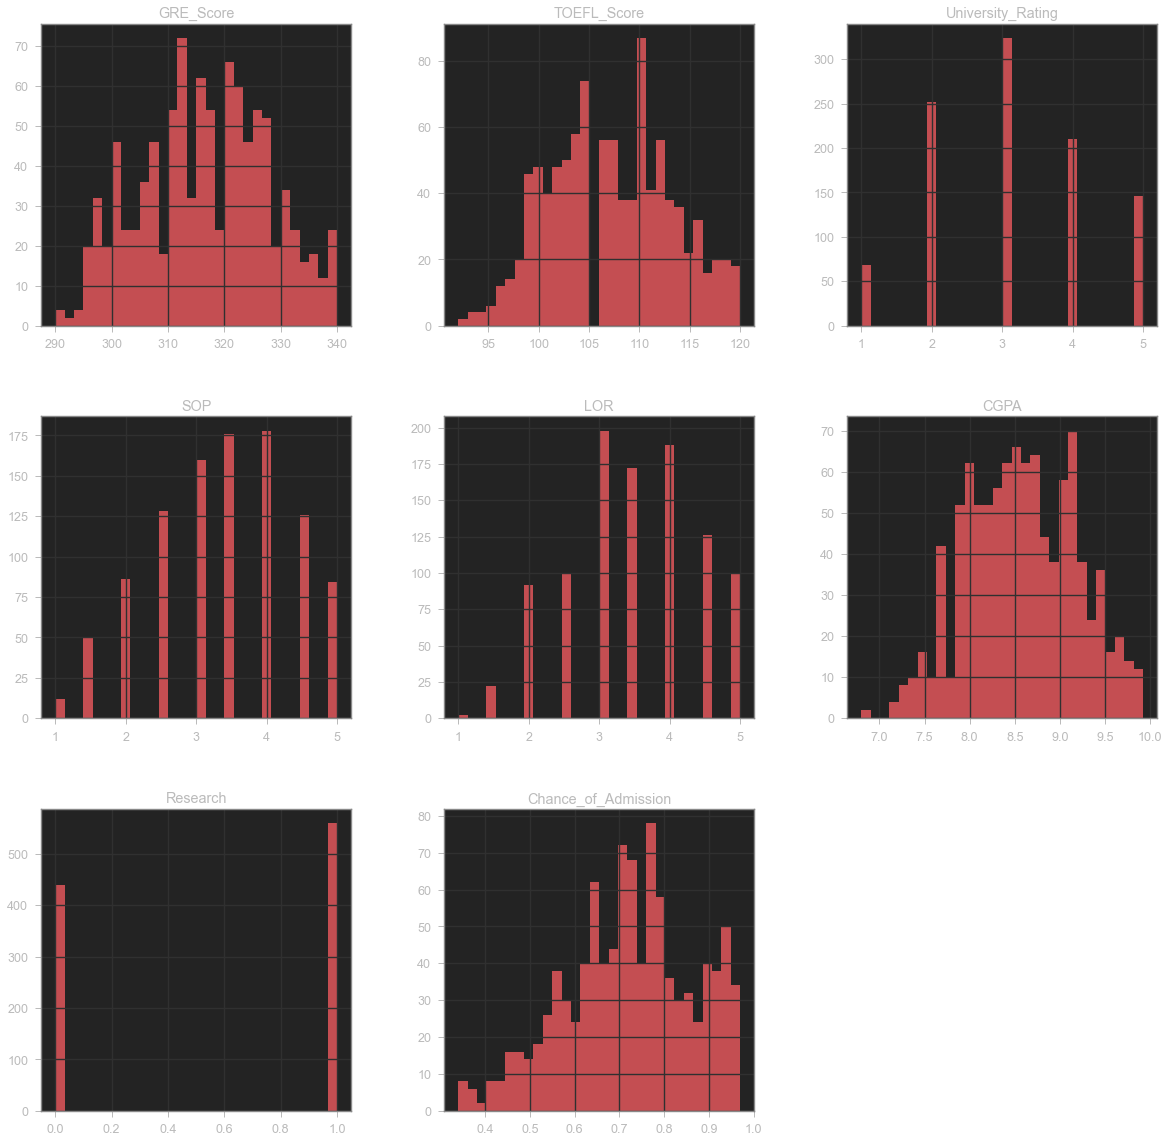

In [ ]:
df.hist(bins = 30, figsize = (20,20), color = 'r');
plt.show()

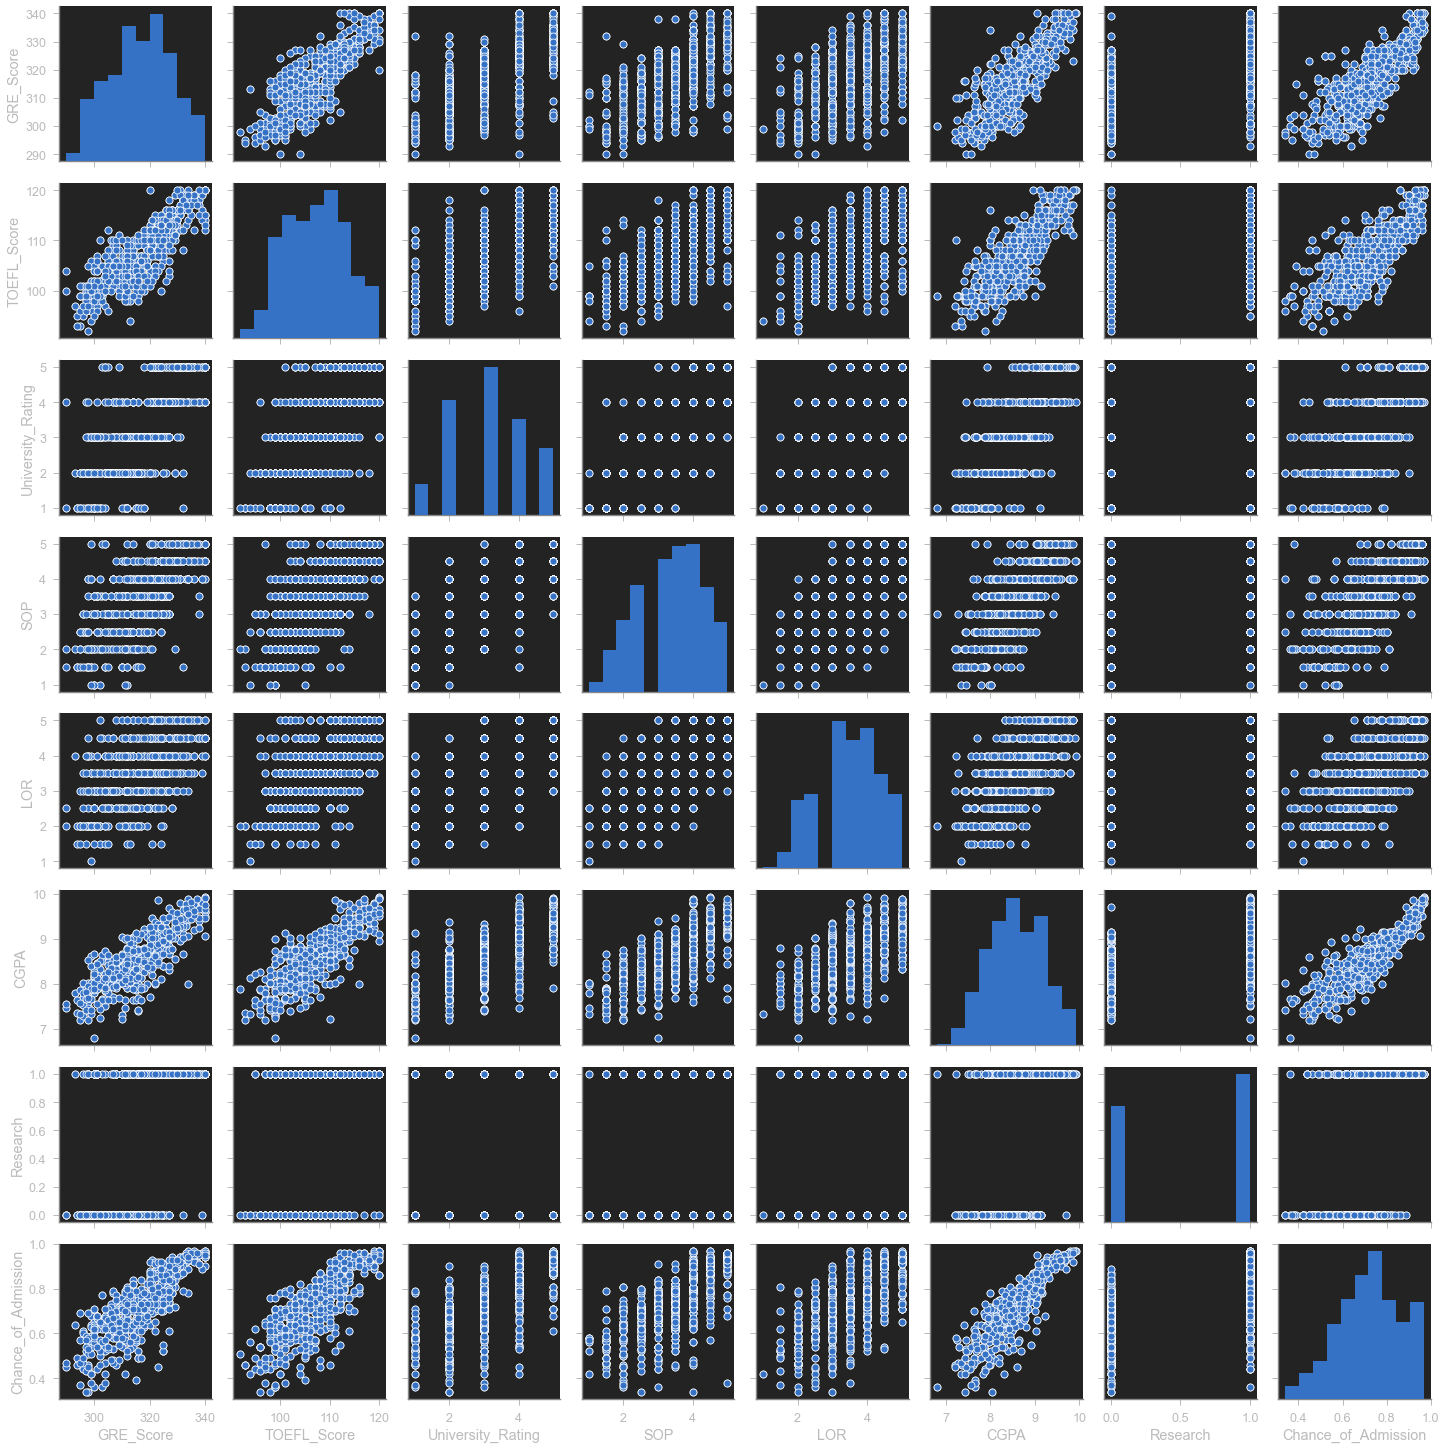

In [ ]:
sns.pairplot(df)
plt.show()

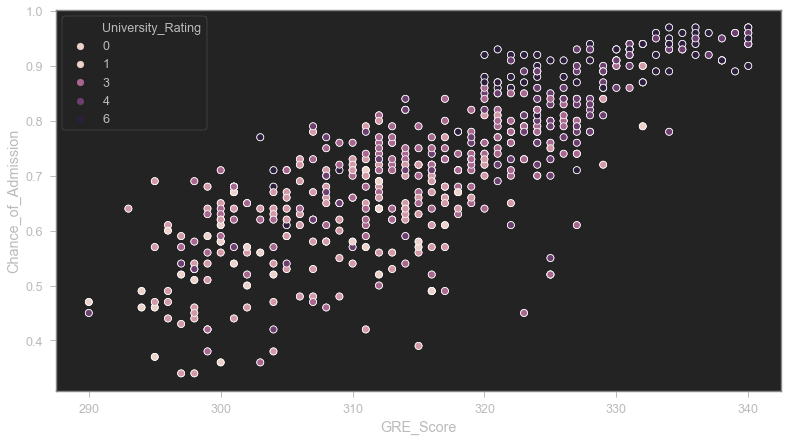

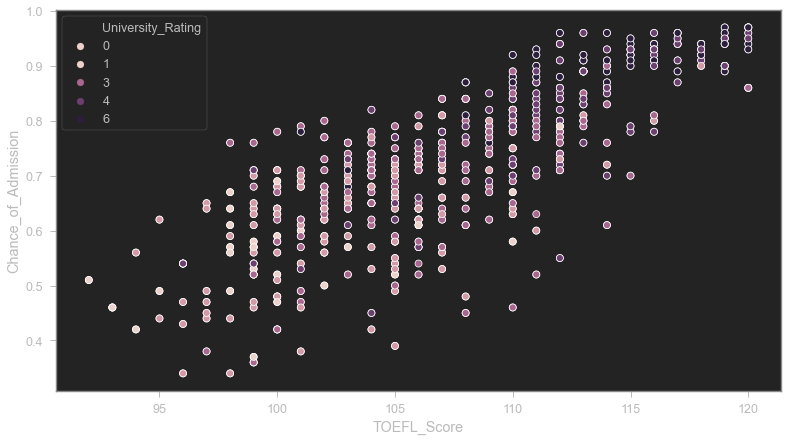

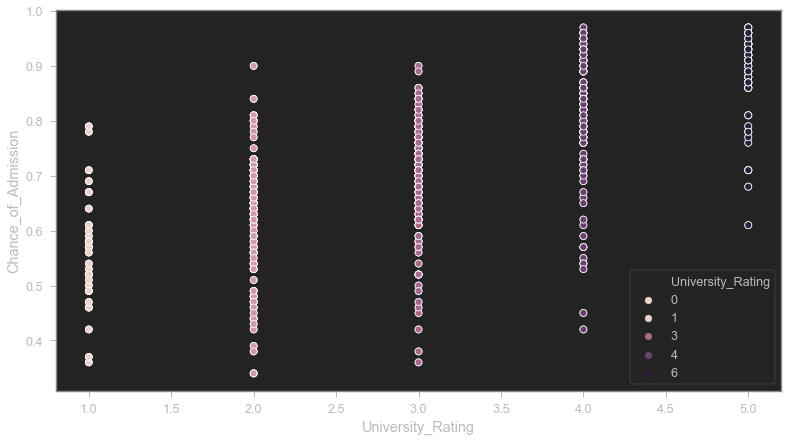

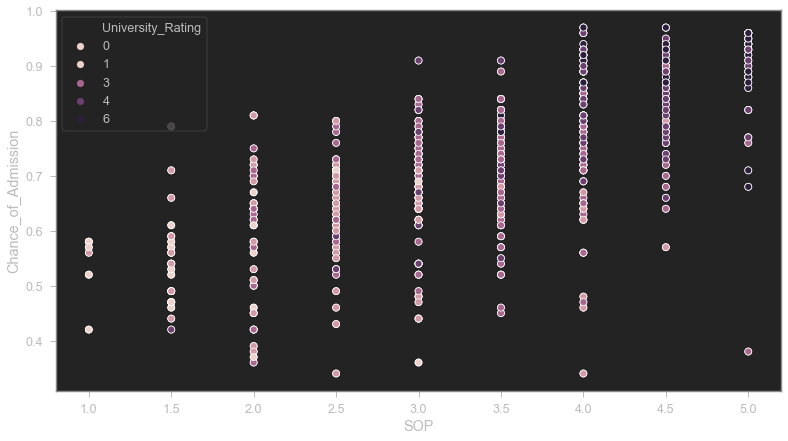

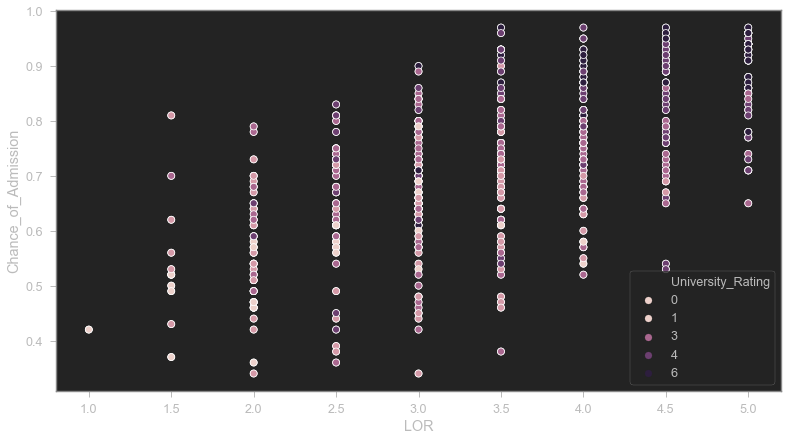

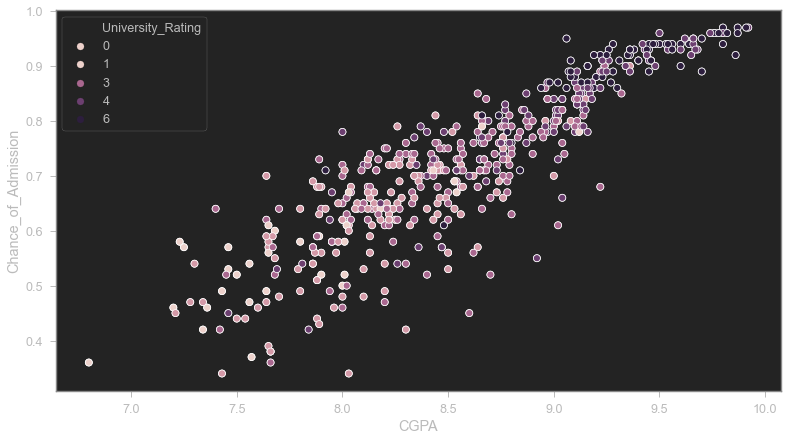

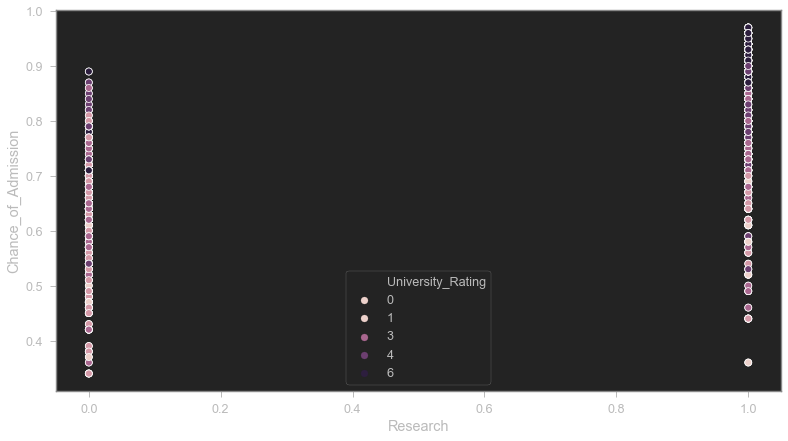

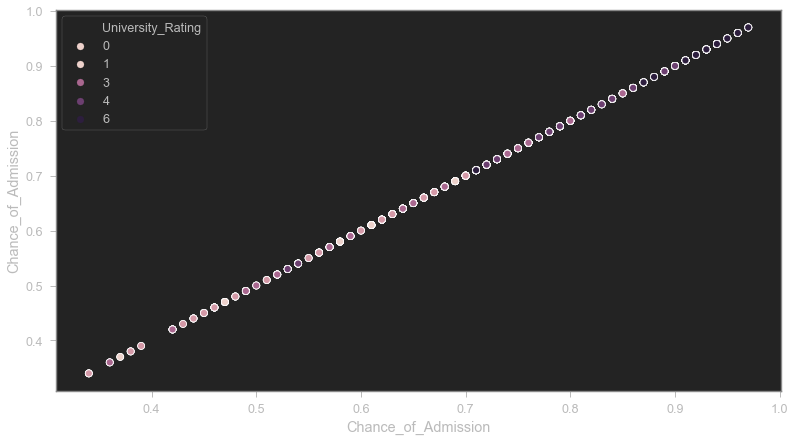

In [ ]:
for i in df.columns:

  plt.figure(figsize = (13, 7))
  sns.scatterplot(x = i, y = 'Chance_of_Admission', hue = "University_Rating", hue_norm = (1,5), data = df)
  plt.show()

In [ ]:
X = df.drop(columns = ['Chance_of_Admission'])

In [ ]:
y = df['Chance_of_Admission']

In [ ]:
X.shape

(1000, 7)

In [ ]:
y.shape

(1000,)

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
# reshaping the array from (500,) to (500, 1)
y = y.reshape(-1,1)
y.shape

(1000, 1)

In [ ]:
# spliting the data into training, testing and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
X_train.shape

(700, 7)

In [ ]:
X_test.shape

(300, 7)

In [ ]:
# Train an XGBoost regressor model
import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 2, n_estimators = 100)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
# predict the score of the trained model using the testing dataset
result = model.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.8601514764866941


In [ ]:
# make predictions on the test data
y_predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 0.055 
MSE = 0.0030563739426584654 
MAE = 0.037826860292752576 
R2 = 0.8601514764866941 
Adjusted R2 = 0.8567989433887724


# EXCELLENT JOB!